In [3]:
from keras.datasets import mnist
from matplotlib import pyplot

# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

In [9]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
trainy[0]

5

In [13]:
# summarise loaded dataset
print('Train: X = %s, y = %s' %(trainX.shape, trainy.shape))

Train: X = (60000, 28, 28), y = (60000,)


In [14]:
print('Test: X = %s, y = %s' %(testX.shape, testy.shape))

Test: X = (10000, 28, 28), y = (10000,)


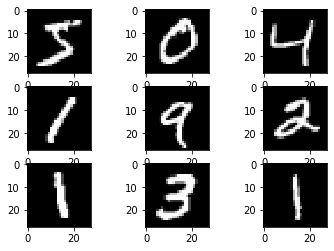

In [22]:
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap = pyplot.get_cmap('gray'))
    
# show the figure
pyplot.show()

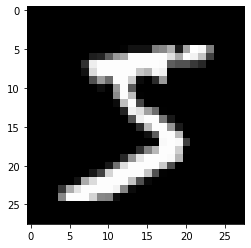

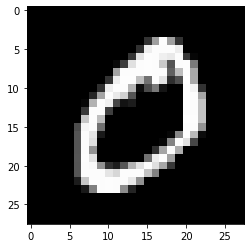

In [42]:
for i in range(2):
    pyplot.imshow(trainX[i], cmap = pyplot.get_cmap('gray'))
    pyplot.show()